In [1]:
import numpy as np
from collections import Counter
import requests
from bs4 import BeautifulSoup
import re
import os
import random
import time

headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.114 Safari/537.36',
    'referer': 'https://www.google.com/'
}

# generate defferent ramdom headers for each request
user_agent_list = [
    "Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1; AcooBrowser; .NET CLR 1.1.4322; .NET CLR 2.0.50727)",
    "Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 6.0; Acoo Browser; SLCC1; .NET CLR 2.0.50727; Media Center PC 5.0; .NET CLR 3.0.04506)",
    "Mozilla/4.0 (compatible; MSIE 7.0; AOL 9.5; AOLBuild 4337.35; Windows NT 5.1; .NET CLR 1.1.4322; .NET CLR 2.0.50727)",
    "Mozilla/5.0 (Windows; U; MSIE 9.0; Windows NT 9.0; en-US)",
    "Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Win64; x64; Trident/5.0; .NET CLR 3.5.30729; .NET CLR 3.0.30729; .NET CLR 2.0.50727; Media Center PC 6.0)",
    "Mozilla/5.0 (compatible; MSIE 8.0; Windows NT 6.0; Trident/4.0; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; .NET CLR 1.0.3705; .NET CLR 1.1.4322)",
    "Mozilla/4.0 (compatible; MSIE 7.0b; Windows NT 5.2; .NET CLR 1.1.4322; .NET CLR 2.0.50727; InfoPath.2; .NET CLR 3.0.04506.30)",
    "Mozilla/5.0 (Windows; U; Windows NT 5.1; zh-CN) AppleWebKit/523.15 (KHTML, like Gecko, Safari/419.3) Arora/0.3 (Change: 287 c9dfb30)",
    "Mozilla/5.0 (X11; U; Linux; en-US) AppleWebKit/527+ (KHTML, like Gecko, Safari/419.3) Arora/0.6",
    "Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.8.1.2pre) Gecko/20070215 K-Ninja/2.1.1",
    "Mozilla/5.0 (Windows; U; Windows NT 5.1; zh-CN; rv:1.9) Gecko/20080705 Firefox/3.0 Kapiko/3.0",
    "Mozilla/5.0 (X11; Linux i686; U;) Gecko/20070322 Kazehakase/0.4.5",
    "Mozilla/5.0 (X11; U; Linux i686; en-US; rv:1.9.0.8) Gecko Fedora/1.9.0.8-1.fc10 Kazehakase/0.5.6",
    "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.56 Safari/535.11",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_3) AppleWebKit/535.20 (KHTML, like Gecko) Chrome/19.0.1036.7 Safari/535.20",
    "Opera/9.80 (Macintosh; Intel Mac OS X 10.6.8; U; fr) Presto/2.9.168 Version/11.52",
    "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.11 (KHTML, like Gecko) Chrome/20.0.1132.11 TaoBrowser/2.0 Safari/536.11",
    "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/21.0.1180.71 Safari/537.1 LBBROWSER",
    "Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; WOW64; Trident/5.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .NET4.0C; .NET4.0E; LBBROWSER)",
    "Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1; QQDownload 732; .NET4.0C; .NET4.0E; LBBROWSER)",
    "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.84 Safari/535.11 LBBROWSER",
    "Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 6.1; WOW64; Trident/5.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .NET4.0C; .NET4.0E)",
    "Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; WOW64; Trident/5.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .NET4.0C; .NET4.0E; QQBrowser/7.0.3698.400)",
    "Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1; QQDownload 732; .NET4.0C; .NET4.0E)",
    "Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1; Trident/4.0; SV1; QQDownload 732; .NET4.0C; .NET4.0E; 360SE)",
    "Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1; QQDownload 732; .NET4.0C; .NET4.0E)",
    "Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 6.1; WOW64; Trident/5.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .NET4.0C; .NET4.0E)",
    "Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/21.0.1180.89 Safari/537.1",
    "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/21.0.1180.89 Safari/537.1",
    "Mozilla/5.0 (iPad; U; CPU OS 4_2_1 like Mac OS X; zh-cn) AppleWebKit/533.17.9 (KHTML, like Gecko) Version/5.0.2 Mobile/8C148 Safari/6533.18.5",
    "Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:2.0b13pre) Gecko/20110307 Firefox/4.0b13pre",
    "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:16.0) Gecko/20100101 Firefox/16.0",
    "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11",
    "Mozilla/5.0 (X11; U; Linux x86_64; zh-CN; rv:1.9.2.10) Gecko/20100922 Ubuntu/10.10 (maverick) Firefox/3.6.10",
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"   
]

def get_headers():
    headers['User-Agent'] = random.choice(user_agent_list)
    return headers

In [2]:
def parse_html(html_text:str) -> str:
    soup = BeautifulSoup(html_text, 'html.parser')
    text = soup.get_text()
    return text

def delete_non_chinese(string:str) -> str:
    return re.sub(r'[^\u4e00-\u9fa5]','',string)

def delete_non_english(string:str) -> str:
    return re.sub(r'[^\u0041-\u005a\u0061-\u007a]','',string)

def analyze_entropy(string:str, print_info:bool=True) -> float:
    count = Counter(string)
    times = np.array(list(count.values()))
    proportion = times/np.sum(times)
    entropy = -np.sum(proportion*np.log2(proportion))

    if print_info:
        print("| 总字符数", np.sum(times))
        print("| 不同字符数", len(times))
        print("| TOP 10 字符及其出现频率")
        print("|", end=" ")
        for char, freq in count.most_common(10):
            print(char, round(freq/np.sum(times), 4), end=" ")
        print(" ")
        print("| 熵", entropy)
    return entropy

def analyze_text(text:str, Chinese_only:bool=False, English_only:bool=False) -> None:
    if Chinese_only:
        print("去除英文/数字/标点符号后")
        analyze_entropy(delete_non_chinese(text))
    elif English_only:
        print("只保留英文字母后")
        analyze_entropy(delete_non_english(text))
    else:
        analyze_entropy(text)

def analyze_urls(urls:list, name:str, Chinese_only:bool=False, English_only:bool=False) -> None:
    print(name)

    text = ""
    if not os.path.exists(name+".txt"):
        for url in urls:
            print("爬取网页", url)
            response = requests.get(url, headers=headers)
            text += parse_html(response.text)
            time.sleep(random.uniform(1.0,3.0))

        with open(name+".txt", "w", encoding="utf-8") as f:
            f.write(text)
    
    with open(name+".txt", "r", encoding="utf-8") as f:
        # 若曾经抓取过该网页且缓存到本地，则使用本地历史数据
        text = f.read()
    
    analyze_text(text, Chinese_only, English_only)



In [24]:
analyze_urls(["https://www.gutenberg.org/files/1524/1524-h/1524-h.htm"],
            "莎士比亚《哈姆雷特》1603 英语", English_only=True)

莎士比亚《哈姆雷特》1603 英语
只保留英文字母后
| 总字符数 149594
| 不同字符数 52
| TOP 10 字符及其出现频率
| e 0.1086 t 0.0829 o 0.0791 a 0.0653 n 0.0595 s 0.058 i 0.0568 r 0.0564 h 0.0551 l 0.0391  
| 熵 4.655863529271688


In [25]:
analyze_urls(["https://raw.githubusercontent.com/khushmeeet/potter-nlp/master/data/Book%201%20-%20The%20Philosopher's%20Stone_djvu.txt.html"], 
              "J.K.罗琳《哈利波特》1997 英语", English_only=True)

J.K.罗琳《哈利波特》1997 英语
只保留英文字母后
| 总字符数 352746
| 不同字符数 52
| TOP 10 字符及其出现频率
| e 0.1177 t 0.0835 o 0.0784 a 0.0766 r 0.0638 n 0.0636 h 0.0583 i 0.0573 s 0.0557 d 0.0463  
| 熵 4.452632877477386


In [27]:
name = "胡伟武等《计算机体系结构基础》2022 中文"
html_set = set()
if not os.path.exists(name+".txt"):
    url = "https://foxsen.github.io/archbase/"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    
    for item in soup.find_all('li',{'class':'chapter'}):
        html_set.add(url+item.get('data-path'))

analyze_urls(html_set, name, Chinese_only=True)

胡伟武等《计算机体系结构基础》2022 中文
去除英文/数字/标点符号后
| 总字符数 236171
| 不同字符数 1510
| TOP 10 字符及其出现频率
| 的 0.0453 器 0.0151 存 0.0121 指 0.0108 一 0.0106 用 0.0106 行 0.0105 理 0.0103 数 0.0102 程 0.01  
| 熵 8.513406461425053


In [ ]:
max_id = 60000
num = 30
en_name = "Gutenberg 1-%d" % num
urls = []
for i in range(1, num):
    urls.append("https://www.gutenberg.org/files/%d/%d-h/%d-h.htm" % (i, i, i))
analyze_urls(urls, en_name, English_only=True)

In [ ]:
with open(en_name+".txt", "r", encoding="utf-8") as f:
    en_text = f.read()

en_text = delete_non_english(en_text)

# randomly shuffle
en_text = list(en_text)
random.shuffle(en_text)
en_text = "".join(en_text)

for i in range(1000000, len(en_text), 1000000):
    print("分析字符 0-%d" % i)
    print(analyze_entropy(en_text[:i], print_info=False))

In [10]:
# 中文文本收集
max_id = 20000
url = "https://www.555x.org"

while True:
    id = random.randint(100000,999999)
    print("文本号", id)
    word_count = 0
    with open("Chinese/"+str(id)+".txt", "w", encoding="utf-8") as f:
        while word_count<2000000:
            id = random.randint(1,max_id)
            try:
                response = requests.get(url+"/txt"+str(id)+".html", headers=get_headers())
            except Exception as e:
                print(e)
                continue
            soup = BeautifulSoup(response.text, "html.parser")
            for item in soup.find_all('a'):
                if item.get('href') and item.get('href').startswith("/read/"):
                    whole_url = url+item.get('href')
                    print("当前字数", word_count, "爬取网页", whole_url)
                    try:
                        response = requests.get(whole_url, headers=get_headers())
                    except Exception as e:
                        print(e)
                        continue
                    soup = BeautifulSoup(response.text, 'html.parser')
                    if soup.find_all(name="div",attrs={"id":"booktxt"}):
                        text = soup.find_all(name="div",attrs={"id":"booktxt"})[0].get_text()
                        text = delete_non_chinese(text)
                        f.write(text)
                        word_count += len(text)

文本号 727269
当前字数 0 爬取网页 https://www.555x.org/read/9518/10310174.html
当前字数 1507 爬取网页 https://www.555x.org/read/9518/10310174.html
当前字数 3014 爬取网页 https://www.555x.org/read/9518/7548144.html
当前字数 3862 爬取网页 https://www.555x.org/read/9518.html
当前字数 3862 爬取网页 https://www.555x.org/read/9518/10310174.html
当前字数 5369 爬取网页 https://www.555x.org/read/9518/10306177.html
当前字数 6349 爬取网页 https://www.555x.org/read/9518/10302655.html
当前字数 7319 爬取网页 https://www.555x.org/read/9518/10299244.html
当前字数 8465 爬取网页 https://www.555x.org/read/9518/10294153.html
当前字数 9308 爬取网页 https://www.555x.org/read/9518/10247890.html
当前字数 10285 爬取网页 https://www.555x.org/read/9518/10190505.html
当前字数 11244 爬取网页 https://www.555x.org/read/9518/10174179.html
当前字数 12378 爬取网页 https://www.555x.org/read/9518.html
当前字数 12378 爬取网页 https://www.555x.org/read/9518/7548144.html
当前字数 13226 爬取网页 https://www.555x.org/read/9518/7548145.html
当前字数 14060 爬取网页 https://www.555x.org/read/9518/7548146.html
当前字数 15009 爬取网页 https://www.555x.org/read/9518/7

KeyboardInterrupt: 

In [8]:
# 英文文本收集
max_id = 60000

while True:
    id = random.randint(100000,999999)
    print("文本号", id)
    word_count = 0
    with open("English/"+str(id)+".txt", "w", encoding="utf-8") as f:
        while word_count<2000000:
            id = random.randint(1,max_id)
            url = "https://www.gutenberg.org/files/%d/%d-h/%d-h.htm" % (id, id, id)
            print("当前字数", word_count, "爬取网页", url)
            try:
                response = requests.get(url)
            except Exception as e:
                print(e)
                continue
            text = delete_non_english(parse_html(response.text))
            f.write(text)
            word_count += len(text)
        

文本号 464472
当前字数 0 爬取网页 https://www.gutenberg.org/files/41046/41046-h/41046-h.htm
当前字数 1039094 爬取网页 https://www.gutenberg.org/files/59733/59733-h/59733-h.htm
当前字数 1195514 爬取网页 https://www.gutenberg.org/files/39609/39609-h/39609-h.htm
当前字数 1237618 爬取网页 https://www.gutenberg.org/files/5771/5771-h/5771-h.htm
当前字数 1238317 爬取网页 https://www.gutenberg.org/files/30035/30035-h/30035-h.htm
当前字数 1266161 爬取网页 https://www.gutenberg.org/files/43320/43320-h/43320-h.htm
当前字数 1734278 爬取网页 https://www.gutenberg.org/files/59815/59815-h/59815-h.htm
文本号 255036
当前字数 0 爬取网页 https://www.gutenberg.org/files/23514/23514-h/23514-h.htm
当前字数 32748 爬取网页 https://www.gutenberg.org/files/16062/16062-h/16062-h.htm
当前字数 89331 爬取网页 https://www.gutenberg.org/files/31437/31437-h/31437-h.htm
当前字数 90030 爬取网页 https://www.gutenberg.org/files/55811/55811-h/55811-h.htm
当前字数 90729 爬取网页 https://www.gutenberg.org/files/51291/51291-h/51291-h.htm
当前字数 1398853 爬取网页 https://www.gutenberg.org/files/40662/40662-h/40662-h.htm
当前字数 1518486 

KeyboardInterrupt: 

In [3]:
# 语言分析
from matplotlib import pyplot as plt

def analyze_language(dir_name:str)->None:
    text = ""
    for file_name in os.listdir(dir_name):
        with open(dir_name+"/"+file_name, "r", encoding="utf-8") as f:
            text+=f.read()
    text = list(text)
    random.shuffle(text)
    text = "".join(text)

    analyze_entropy(text, print_info=True)

    x=[]
    y=[]
    for i in range(1000000, len(text), 1000000):
        print("分析字符 0-%d" % i)
        entropy = analyze_entropy(text[:i], print_info=False)
        print(entropy)
        x.append(i)
        y.append(entropy)

    plt.xlabel("number of characters")
    plt.ylabel("entropy")
    plt.plot(x, y)
    plt.show()
    

| 总字符数 19626942
| 不同字符数 5638
| TOP 10 字符及其出现频率
| 的 0.037 了 0.02 一 0.0188 是 0.0169 不 0.0155 这 0.0104 有 0.0092 在 0.0092 他 0.009 人 0.0086  
| 熵 9.526591680010556
分析字符 0-1000000
9.515862657633734
分析字符 0-2000000
9.519940726669615
分析字符 0-3000000
9.522658334768654
分析字符 0-4000000
9.522618849729776
分析字符 0-5000000
9.524092805842768
分析字符 0-6000000
9.525009564085899
分析字符 0-7000000
9.525283687925604
分析字符 0-8000000
9.525290200498791
分析字符 0-9000000
9.525495976626871
分析字符 0-10000000
9.525678246712928
分析字符 0-11000000
9.525923097006102
分析字符 0-12000000
9.525935737115299
分析字符 0-13000000
9.525937402475096
分析字符 0-14000000
9.526058232791446
分析字符 0-15000000
9.525963266988514
分析字符 0-16000000
9.526075649380902
分析字符 0-17000000
9.52632564693403
分析字符 0-18000000
9.526609818287017
分析字符 0-19000000
9.526492305248402


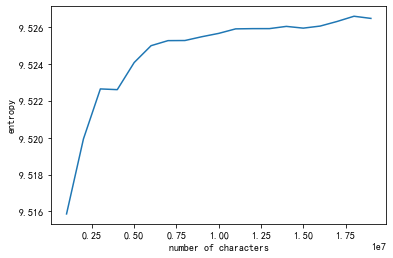

In [4]:
analyze_language("Chinese")

| 总字符数 101734050
| 不同字符数 52
| TOP 10 字符及其出现频率
| e 0.127 t 0.0851 a 0.0776 o 0.0734 n 0.0696 i 0.0672 r 0.0617 s 0.0608 h 0.052 d 0.0409  
| 熵 4.399275993574462
分析字符 0-1000000
4.40009126179001
分析字符 0-2000000
4.399348215271804
分析字符 0-3000000
4.399044959284059
分析字符 0-4000000
4.399108468755493
分析字符 0-5000000
4.398925836363624
分析字符 0-6000000
4.398823205025142
分析字符 0-7000000
4.399172257055252
分析字符 0-8000000
4.399090687770541
分析字符 0-9000000
4.39935105556572
分析字符 0-10000000
4.399291557633148
分析字符 0-11000000
4.39937025637635
分析字符 0-12000000
4.39942757155774
分析字符 0-13000000
4.39933593548318
分析字符 0-14000000
4.399302353866347
分析字符 0-15000000
4.399165790934662
分析字符 0-16000000
4.399168290341329
分析字符 0-17000000
4.39919824480409
分析字符 0-18000000
4.399103463607413
分析字符 0-19000000
4.399261614303464
分析字符 0-20000000
4.39921836810587
分析字符 0-21000000
4.3992403799097195
分析字符 0-22000000
4.3993897698399245
分析字符 0-23000000
4.399374764813186
分析字符 0-24000000
4.399367618776648
分析字符 0-25000000
4.399379596520505
分析字符

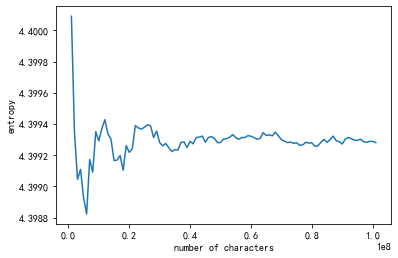

In [9]:
analyze_language("English")